In [21]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [22]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer as tfid

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from matplotlib import pyplot

import seaborn as sns

import string
from nltk.corpus import stopwords
import re

In [23]:
SadNews = pd.read_excel("../input/Arabic_sad_news_ responses.xlsx")
SadNews.head(3)


,favorite_count,full_text,reply_count,retweet_count,class,category,case
0,0,@_kh5i @AJELNEWS24 البقا براسك,NaN,NaN,1,dead,1
1,0,@_kh5i @AJELNEWS24 البقا براسك,0,0,1,dead,1
2,0,@6xlery @AJELNEWS24 لا صدقي للأسف مات,NaN,NaN,0,dead,1


In [24]:
SadNews.shape

(2264, 7)

In [25]:
'''
The first step is to subject the data to preprocessing.
This involves removing both arabic and english punctuation
Normalizing different letter variants with one common letter
'''
# first we define a list of arabic and english punctiations that we want to get rid of in our text

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Arabic stop words with nltk
stop_words = stopwords.words()

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    
    '''
    text is an arabic string input
    
    the preprocessed text is returned
    '''
    
    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)
    
    #remove longation
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

In [28]:


train = SadNews.drop(columns=['favorite_count', 'reply_count', 'retweet_count', 'category', 'case'], axis=1)
train.shape

(2264, 2)

In [29]:
train.head()

,full_text,class
0,@_kh5i @AJELNEWS24 البقا براسك,1
1,@_kh5i @AJELNEWS24 البقا براسك,1
2,@6xlery @AJELNEWS24 لا صدقي للأسف مات,0
3,@6xlery @AJELNEWS24 لا صدقي للأسف مات,1
4,@AbomhmdAlyafaay @AlArabiya_Brk يعلمون منذ ايا...,0


In [27]:
train = SadNews.drop_duplicates()
train.shape

#train.head(33)

(2100, 7)

In [8]:
# using TfIdf to make words as features by making word vectors

tfidf = tfid(max_features=9000)
features_tfidf = tfidf.fit_transform(SadNews['full_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf

(2264, 8821)
Sparse Matrix :
   (0, 2974)	0.5704158673585816
  (0, 1480)	0.5704158673585816
  (0, 99)	0.15452253815114111
  (0, 71)	0.5704158673585816
  (1, 2974)	0.5704158673585816
  (1, 1480)	0.5704158673585816
  (1, 99)	0.15452253815114111
  (1, 71)	0.5704158673585816
  (2, 6009)	0.3558004646257415
  (2, 5801)	0.47410420101724987
  (2, 4673)	0.5333581610474408
  (2, 5569)	0.24251558547547336
  (2, 48)	0.5333581610474408
  (2, 99)	0.14448380822629958
  (3, 6009)	0.3558004646257415
  (3, 5801)	0.47410420101724987
  (3, 4673)	0.5333581610474408
  (3, 5569)	0.24251558547547336
  (3, 48)	0.5333581610474408
  (3, 99)	0.14448380822629958
  (4, 2187)	0.0982948970720108
  (4, 5774)	0.4231742417308538
  (4, 990)	0.35717262938260724
  (4, 5294)	0.2680469551066173
  (4, 6537)	0.29929242041954934
  :	:
  (2263, 4739)	0.22133595522317087
  (2263, 7997)	0.22133595522317087
  (2263, 5743)	0.22133595522317087
  (2263, 2069)	0.22133595522317087
  (2263, 1108)	0.22133595522317087
  (2263, 6375)	0.2213

,000,0861ua4yi4,0kxbgvjrdz,0lxm3sw1rk,0nwdzgpfcz,0xgklgesnx,11nb9oip5q,135,150,1975,...,٥أيام,٥ايام,٥٨,٦٠,٨الليل,٨٥,چان,چنه,گلبها,گمان
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
target = SadNews['class']

final_df = pd.concat([pd.DataFrame(features_tfidf)], axis=1)
final_df.head()

,000,0861ua4yi4,0kxbgvjrdz,0lxm3sw1rk,0nwdzgpfcz,0xgklgesnx,11nb9oip5q,135,150,1975,...,٥أيام,٥ايام,٥٨,٦٠,٨الليل,٨٥,چان,چنه,گلبها,گمان
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(final_df,target,test_size=0.20)

LR recall score is 0.98
LR precision score is 0.79
LR Accuracy score is 0.79
              precision    recall  f1-score   support

           0       0.79      0.23      0.35       115
           1       0.79      0.98      0.87       338

    accuracy                           0.79       453
   macro avg       0.79      0.60      0.61       453
weighted avg       0.79      0.79      0.74       453



<AxesSubplot:>

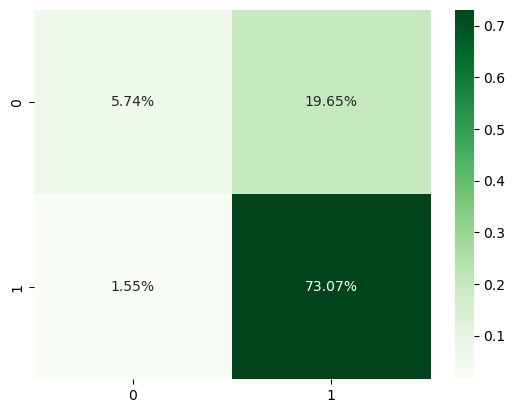

In [11]:
#LR

lr = LogisticRegression(random_state = 42, max_iter=1000)    
    


# create and fit the model
lr.fit(X_train,y_train)

# make prediction and print accuracy
prediction = lr.predict(X_test)
print(f"LR recall score is {recall_score(y_test, prediction):.2f}")
print(f"LR precision score is {precision_score(y_test, prediction):.2f}")
print(f"LR Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Greens')


NB recall score is 0.99
NB precision score is 0.76
NB Accuracy score is 0.76
              precision    recall  f1-score   support

           0       0.80      0.07      0.13       115
           1       0.76      0.99      0.86       338

    accuracy                           0.76       453
   macro avg       0.78      0.53      0.49       453
weighted avg       0.77      0.76      0.67       453



<AxesSubplot:>

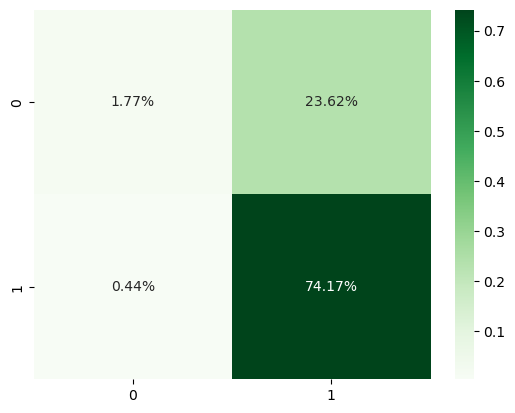

In [12]:
#NB

nb = MultinomialNB()    
    
k_fold = KFold(n_splits=5)
cross_val_score(nb, final_df, target, cv=k_fold, scoring='recall')

# create and fit the model
nb.fit(X_train,y_train)

# make prediction and print accuracy
prediction = nb.predict(X_test)
print(f"NB recall score is {recall_score(y_test, prediction):.2f}")
print(f"NB precision score is {precision_score(y_test, prediction):.2f}")
print(f"NB Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Greens')

In [13]:
# param_grid = {'C': [1, 3], 'gamma': [1,0.1],'kernel': ['linear']}

# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
# grid.fit(X_train,y_train)

# print(grid.best_estimator_)

SVM recall score is 0.96
SVM precision score is 0.83
SVM Accuracy score is 0.82
              precision    recall  f1-score   support

           0       0.76      0.42      0.54       115
           1       0.83      0.96      0.89       338

    accuracy                           0.82       453
   macro avg       0.80      0.69      0.71       453
weighted avg       0.81      0.82      0.80       453



<AxesSubplot:>

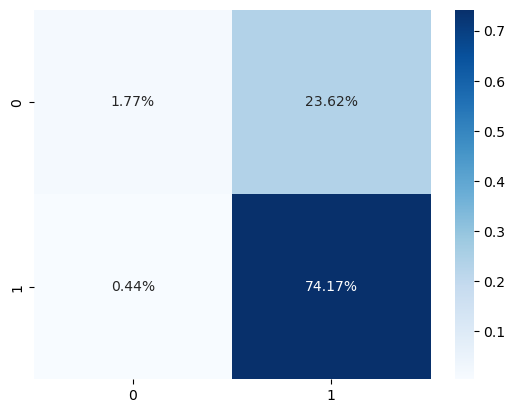

In [14]:
#SVM


svc_model = SVC(kernel='rbf', gamma=1, C=3, probability=True, max_iter=1000)


k_fold = KFold(n_splits=5)
cross_val_score(svc_model, final_df, target, cv=k_fold, scoring='recall')

# create and fit the model
svc_model.fit(X_train,y_train)

prediction = svc_model.predict(X_test)
print(f"SVM recall score is {recall_score(y_test, prediction):.2f}")
print(f"SVM precision score is {precision_score(y_test, prediction):.2f}")
print(f"SVM Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Models Perfomance

In [35]:
! pip install scikit-plot

In [36]:
import scikitplot as skplt

In [31]:
lr_probas = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
nb_probas = MultinomialNB().fit(X_train, y_train).predict_proba(X_test)
svm_probas = svc_model.fit(X_train, y_train).predict_proba(X_test)


probas_list = [lr_probas, nb_probas, svm_probas]
clf_names = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine']

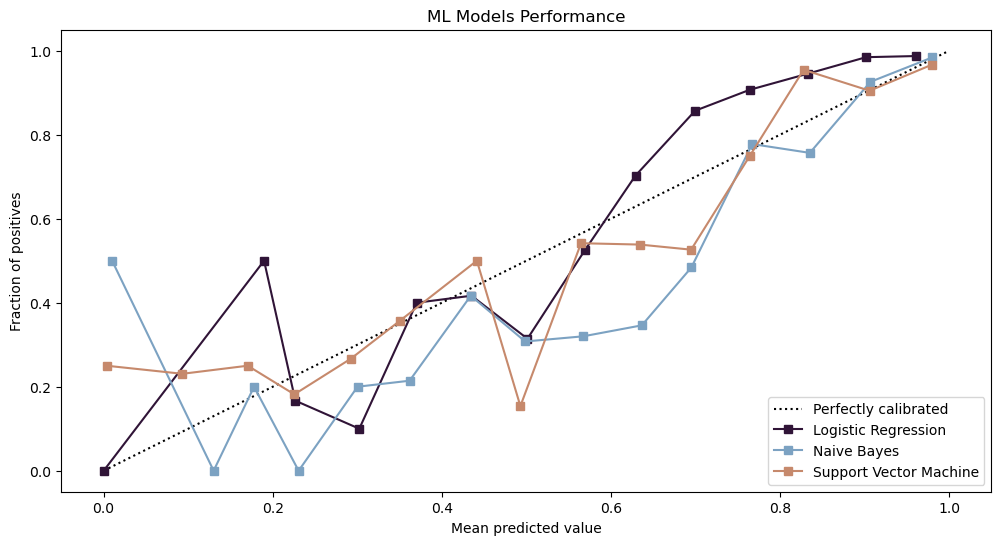

In [42]:
skplt.metrics.plot_calibration_curve(y_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     cmap = 'twilight_shifted',
                                     figsize=(12,6),
                                     title="ML Models Performance"
                                     );